# Basil Docking V0.1 - Docking Preparation
## Purpose

__Target Audience__<br>
Undergraduate chemistry/biochemistry students and, in general, people that have little to no knowledge of protein-ligand docking and would like to understand the general process of docking a ligand to a protein receptor.

__Brief Overview__<br>
Molecular docking is a computational method used to predict where molecules are able to bind to a protein receptor and what interactions exist between the molecule (from now on, refered to as "ligand") and the receptor. It is a popular technique utilized in drug discovery and design, as when creating new drugs and testing existing drugs aginst new receptors, it is useful to determine the likelihood of binding prior to screening as it can be used to eliminate molecules that are unlikely to bind to the receptor. This significantly reduces the potential cost and time needed to test the efficacy of a set of possible ligands. <br>

The general steps to perform molecular docking, assuming the ligand and receptor are ready to be docked, include the generation of potential ligand binding poses and the scoring of each generated pose (which predicts how strongly the ligand binds to the receptor, with a more negative score corresponding to a stronger bond). To dock a ligand to a protein, both the receptor and the ligand/s need to be "sanitized"; which includes making sure bonds and protonation states are as they would be in an organism. The receptor and ligand/s also need to be converted into the correct file formats and (more). (more text)<br>

This notebook series encompasses<br>
1. __The preparation needed prior to docking (protein and ligand sanitation, ensuring files are in readable formats, and finding possible binding pockets)__
2. The process of docking ligand/s to a protein receptor using two docking engines (VINA and SMINA) and visualizing/analyzing the outputs
3. Further data collection and manipulation
4. Utilizing machine learning to determine key residues (on the protein) and functional groups (on the ligand) responsible for protein-ligand binding

__Stepwise summary for this notebook (docking preparation, notebook 1 out of 4)__<br>
- Get PDB file from the protein data bank and separate the protein and ligand into different files
- Import additional ligands (if desired)
- Prepare and separate ligands into their own MOL2 and PDBQT files
- Find possible binding pockets in protein
- View protein and ligand/s

The methods utilized by this notebook are based off of Angel J. Ruiz-Moreno's Jupyter-Dock notebooks, which can be found on their GitHub account AngelRuizMoreno

Ruiz-Moreno A.J. Jupyter Dock: Molecular Docking integrated in Jupyter Notebooks. https://doi.org/10.5281/zenodo.5514956

Methods for sanitizing the protein PDBQT file was adapted from Jessica Nash's iqb-2024 repository, which was used in the IQB 2024 workshop - Python for Molecular Docking, and can be found on her GitHub account janash. 

## Table of Libraries Used
### Operations, variable creation, and variable manipulation

| Module (Submodule/s)| Abbreviation| Role | Citation |
| :--- | :--- | :--- | :--- |
| numpy | np | perform mathematical operations, fix NaN values in dataframe outputs, and get docking box values from MDAnalysis | Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2. (Publisher link). |
| pandas | pd | organize data in an easy-to-read format and allow for the exporting of data as a .csv file | The pandas development team. (2024). pandas-dev/pandas: Pandas (v2.2.3). Zenodo. https://doi.org/10.5281/zenodo.13819579 |
| re |n/a| regular expression; find and pull specific strings of characters depending on need, allow for easy naming and variable creation | Van Rossum, G. (2020). The Python Library Reference, release 3.8.2. Python Software Foundation. |
| os | n/a| allow for interaction with computer operating system, including the reading and writing of files |  Van Rossum, G. (2020). The Python Library Reference, release 3.8.2. Python Software Foundation. |
| sys |n/a| manipulate python runtime environment |  Van Rossum, G. (2020). The Python Library Reference, release 3.8.2. Python Software Foundation.|
| glob |n/a| pull files of interest, specifically for blind docking |  Van Rossum, G. (2020). The Python Library Reference, release 3.8.2. Python Software Foundation. |
| warnings | n/a | filter warnings | Van Rossum, G. (2020). The Python Library Reference, release 3.8.2. Python Software Foundation. |

### Protein and Ligand Preparation
| Module (Submodule/s)| Abbreviation | Role | Citation |
| :--- | :--- | :--- | :--- |
| biopython (Bio.PDB, PDBList)| n/a | fetch and download pdb strucures from rcsb.org | Cock, P.J.A. et al. Biopython: freely available Python tools for computational molecular biology and bioinformatics. Bioinformatics 2009 Jun 1; 25(11) 1422-3 https://doi.org/10.1093/bioinformatics/btp163 pmid:19304878 |
| MDAnalysis (PDB)| mda | allow for the selection of atoms for separating protein from ligands and ligands from each other | R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations. In S. Benthall and S. Rostrup, editors, Proceedings of the 15th Python in Science Conference, pages 98-105, Austin, TX, 2016. SciPy, doi:10.25080/majora-629e541a-00e. |
| --- | --- | --- | N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. J. Comput. Chem. 32 (2011), 2319-2327, doi:10.1002/jcc.21787. PMCID:PMC3144279. |
| pdb2pqr | n/a | prepare protein receptors for docking | PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Dolinsky TJ, Czodrowski P, Li H, Nielsen JE, Jensen JH, Klebe G, Baker NA. Nucleic Acids Res. 2007 Jul;35(Web Server issue):W522-5. |
| --- | --- | --- | PDB2PQR: an automated pipeline for the setup of Poisson-Boltzmann electrostatics calculations. Dolinsky TJ, Nielsen JE, McCammon JA, Baker NA. Nucleic Acids Res. 2004 Jul 1;32(Web Server issue):W665-7. |
| open babel (pybel)| n/a | prepare ligands for docking and allow for the conversion of ligand information to different file types |  O'Boyle, N.M., Banck, M., James, C.A. et al. Open Babel: An open chemical toolbox. J Cheminform 3, 33 (2011). https://doi.org/10.1186/1758-2946-3-33.|
| rdkit (Chem)| n/a | ligand sanitation |  RDKit: Open-source cheminformatics; http://www.rdkit.org |
| fpocket | n/a | find possible binding pockets in protein receptors | Le Guilloux, V., Schmidtke, P. & Tuffery, P. Fpocket: An open source platform for ligand pocket detection. BMC Bioinformatics 10, 168 (2009). https://doi.org/10.1186/1471-2105-10-168. |

### Visualization
| Module (Submodule/s)| Abbreviation | Role | Citation |
| :--- | :--- | :--- | :--- |
| rdkit.Chem (Draw)| n/a | ligand visualization |  RDKit: Open-source cheminformatics; http://www.rdkit.org |
| py3Dmol | n/a | apoprotein and protein complex visualization |  Keshavan Seshadri, Peng Liu, and David Ryan Koes. Journal of Chemical Education 2020 97 (10), 3872-3876. https://doi.org/10.1021/acs.jchemed.0c00579. |

### UI
| Module (Submodule/s)| Abbreviation | Role | Citation |
| :--- | :--- | :--- | :--- |
| IPython (ipywidgets, display)| n/a | allow for widgets to be implemented and displayed | Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: https://ipython.org |
| ipywidgets (FileUpload, Dropdown, Text, Layout, Label, Box, HBox)| widgets | create interactable wigets of different types | Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: https://ipython.org |

In [1]:
import numpy as np
import pandas as pd
import numbers
import re
import sys, os
import glob
import ipywidgets as widgets
from ipywidgets import FileUpload, Dropdown, Text, Layout, Label, Box, HBox, Button, Output
from IPython.display import display

from Bio.PDB import PDBList
import pdb2pqr
import MDAnalysis as mda 
from MDAnalysis.coordinates import PDB
from openbabel import pybel
from rdkit import Chem
from rdkit.Chem import Draw

sys.path.insert(1, 'utilities/ligandsplitter/ligandsplitter')
from basefunctions import create_folders, convert_type
from ligandsplit import File_Info, Ligand, retrieve_pdb_file, get_mol2_info, get_ligands, find_ligands_unique, write_mol2, separate_mol2_ligs
from ligandvalidate import parse_unique_ligands, validate_unique_ligands
from ligandsmiles import create_ligands_from_smiles, display_form, create_mols_from_smiles

import py3Dmol

import warnings
warnings.filterwarnings("ignore")

## Retrieve desired protein and ligand/s

The desired protein receptor (and ligand/s, if the PDB entry is a complex) can be retrieved from the Protein Data Bank using the biopython module; specifically, the Bio.PDB package. The retrieved PDB structure file is then cleaned (refering to the removal of water molecules and ions that may interfere with docking) before it is separated into two files using MDAnalysis atom selection: a PDB file containing the protein receptor, and a MOL2 file containing the ligand/s bound to the protein receptor (if present).

In [2]:
current_dir = create_folders()

[Errno 17] File exists: '/Users/leesch/Desktop/BASIL/data'
[Errno 17] File exists: '/Users/leesch/Desktop/BASIL/data/PDB_files'
[Errno 17] File exists: '/Users/leesch/Desktop/BASIL/data/MOL2_files'
[Errno 17] File exists: '/Users/leesch/Desktop/BASIL/data/PDBQT_files'


Using the text input box created from running the cell below, type in the 4-character PDB ID for the desired receptor for molecular docking. The protein can either be just the apoprotein (no bound ligands) or in complex. The subsequent cell splits the PDB file into PDB files containing just the protein and just the ligands (if present)

Here are some possible PDB IDs to use if you need suggestions
- __1oyt__ (small protein with two ligands in complex)
- __id1__ (find a single chain protein with 2-4+ ligands)
- __id2__ (find a multi-chain ligand, all distinct chains)
- __id3__ (find a multi-chain ligand that has some identical chains)

In [3]:
name = Text(value = '', placeholder='Type 4-character PDB ID to be used', disabled=False)
name

Text(value='', placeholder='Type 4-character PDB ID to be used')

In [38]:
# The following four cells implement the fetching of a random PDB ID in order to test as many unique 
# receptors/ligands as possible
import random
import requests
import rcsbsearchapi
from rcsbsearchapi.search import AttributeQuery, Attr, TextQuery, ChemSimilarityQuery

In [ ]:
q1 = AttributeQuery(attribute = "rcsb_entry_info.selected_polymer_entity_types", operator = "exact_match", value = "Protein (only)")
q2 = AttributeQuery(attribute = "rcsb_polymer_entity.formula_weight", operator = "less_or_equal", value = 300)
q3 = AttributeQuery(attribute = "pdbx_database_status.pdb_format_compatible", operator = "exact_match", value = "Y")
query = q1 & q2 & q3
result_random = list(query())

In [ ]:
# using the PDB's advanced search api, generate a random PDB ID to use in docking
lucky = Button(description="I'm feeling lucky",
               disabled=False,
               button_style='',
               tooltip='Click me to generate a random PDB ID',
               icon='check')

output = widgets.Output()
display(lucky, output)

def on_button_clicked(b):
    global new_name
    with output:
        print("Loading...")
        new_name = random.choice(result_random)
        print(f"PDB ID retieved: {new_name}")
        
lucky.on_click(on_button_clicked)

In [4]:
style = {'description_width': 'initial'}
fetch_methods = Dropdown(options = ["Manual", "Random"], description = 'Select Method to Choose PDB ID:', style = style)
fetch_methods

Dropdown(description='Select Method to Choose PDB ID:', options=('Manual', 'Random'), style=DescriptionStyle(d…

In [5]:
style = {'description_width': 'initial'}
file_format = Dropdown(options = ["pdb", "mmcif"], description = 'Select Desired Format for PDB ID File:', style = style)
file_format

Dropdown(description='Select Desired Format for PDB ID File:', options=('pdb', 'mmcif'), style=DescriptionStyl…

In [6]:
pdb_list = PDBList()

# get PDB from pdb.org
pdb_id = ''
if fetch_methods.value == "Manual":
    pdb_id = str(name.value)
else:
    pdb_id = new_name.lower()
retrieve_pdb_file(pdb_id, file_format.value)

Structure exists: 'data/PDB_files/pdb1oyt.ent' 
Comprehensive ligand MOL2 file extracted from PDB ID 1oyt has been saved to data/MOL2_files/1oyt_ligand.mol2
Download completed.


## Separating ligands into separate .mol2 files

__1. Separating ligands from input pdb file into separate mol2 files (if needed)__ <br>
In this notebook, we will make sure that each ligand has its own mol2/pdbqt files. While this isn't a required step for for docking, separating the ligands into separate files makes data collection and analysis easier to perform and understand.

__2. Importing local mol2 files from a personal computer__ <br>
__3. Getting ligand/s mol2 files using SMILES strings__ <br>
In addition to ligand separation, this notebook also contains two methods of retrieving additional ligands to be used in ligand docking other than those present in the original protein complex. This allows for the testing of non-canonical binding agents using ligands that are of interest to the user.

### Method 1 : Obtaining ligands from input PDB file

To create multiple output files from one input file, the original file must be read thoroughly to ensure all data is captured and the resulting files must be carefully pieced together to ensure that the mol2 format is followed perfectly, as any descrepencies in the output files can drastically impact docking results. The function `separate_mol2_ligs` first parses through the input file, obtaining the line numbers for the different attributes (molecule, atom, bond, and substructure) and determining which information belongs to each ligand based on the name associated with it. From this, the following attributes are obtained:
- Molecule Information
    - The line number where molecule information begins in the file
    - Ligand names in order of appearance in the file
    - Whether or not one ligand is present in the original MOL2 file multiple times
- Atom Information
    - The line number where atom information begins in the file
    - The location of the first instance of an atom corresponding to a given ligand
    - The number of atoms in a given ligand
    - The lines of the mol2 file that contain atom information acros all ligands
    - The total number of atoms across all ligands
- Bond Information
    - The line number where bond information begins in the file
    - The location of the first instance of a bond corresponding to a given ligand
    - The number of bonds in a given ligand
    - The lines of the mol2 file that contain bond information across all ligands
    - The total number of bonds across all ligands

Using all of this information, new mol2 files are created for each ligand, with the final number of mol2 files outputted equalling the number of ligands present in the input file.

For more information on the mol2 file format, [this pdf has a lot of useful information](https://www.structbio.vanderbilt.edu/archives/amber-archive/2007/att-1568/01-mol2_2pg_113.pdf)

In [7]:
# create separate mol2 files for ligand/s in input pdb file
file = "data/MOL2_files/" + str(pdb_id) + "_ligand.mol2"
ligs, filenames = separate_mol2_ligs(filename = file)

In [8]:
print(ligs)

['SIN1', 'FSN501']


In [9]:
print(filenames)

['data/MOL2_files/SIN1.mol2', 'data/MOL2_files/FSN501.mol2']


If a protein has multiple identical chains, it is likely that identical ligands are written in the original MOL2 file under different indentifiers (for example, there could be two instances of dimethylsulfide, with one being labelled as DMS101 and the other labelled as DMS102). Since these ligands have an identical structure, only one instance is needed for docking. The cells below compare the SMILES strings of each ligand in the original MOL2 file to see if there are any redundant ligands and to remove all but one instance of the ligand if redundancies are detected.

In [10]:
validate_unique_ligands(ligs)

Testing ligand number 1...
Testing ligand number 2...
Done! List of ligands with unique structures: ['FSN501', 'SIN1']


(['FSN501', 'SIN1'],
 ['data/MOL2_files/FSN501.mol2', 'data/MOL2_files/SIN1.mol2'])

<div class="alert alert-block alert-info">
<b>Please note:</b> Some ligands covalently bind to residues of the receptor, and thus are not good candidates for molecular docking. Iron-sulfur clusters, for example, are cofactors that typically bind to sulfur atoms on CYS residues via thiol exchange or a similar mechanism. This means that trying to dock them into potential binding pockets is not necessarily the best method of determining where they will bind. </div>

Duplicates of a ligand in a protein complex's pdb file can result in innacurate calculations of ligand locations, sizes, and centers in future cells. To prevent this, the chain ID of the first occurence of each ligand present in the input pdb file is recorded, and will be used to accurately and precisely select the atoms present in the ligand.

In [47]:
# determine which chain each ligand is in
lig_chain = []
with open(f"data/PDB_files/{pdb_id}_ligand.pdb", "r") as outfile:
    temp_ligs = []
    data = outfile.readlines()
    for linenum, line in enumerate(data):
        ligand = line.split()
        if "HETATM" in ligand[0]:
            lig1 = ligand[3] + ligand[5]
            if "." in lig1:
                temp_num = re.findall(r'\d+', ligand[4])
                temp2_num = ''.join(str(x) for x in temp_num)
                lig1 = ligand[3] + temp2_num
            if (lig1 in ligs) and (lig1 not in temp_ligs):
                temp_ligs.append(lig1)
                chain_id = ligand[4][0]
                lig_chain.append(chain_id[0])
print(lig_chain)

['I', 'H']


### Method 2:  Adding ligands from the chemical component dictionary

IN PROGRESS.

Import ligands using chemical component dictionary.

Maybe use ligand expo?

In [12]:
chem_types = ["D-beta-peptide, C-gamma linking",
             "D-gamma-peptide, C-delta linking",
             "D-peptide COOH carboxy terminus",
             "D-peptide NH3 amino terminus",
             "D-peptide linking",
             "D-saccharide",
             "D-saccharide, alpha linking",
             "D-saccharide, beta linking",
             "DNA OH 3 prime terminus",
             "DNA OH 5 prime terminus",
             "DNA linking",
             "L-DNA linking",
             "L-RNA linking",
             "L-beta-peptide, C-gamma linking",
             "L-gamma-peptide, C-delta linking",
             "L-peptide COOH carboxy terminus",
             "L-peptide NH3 amino terminus",
             "L-peptide linking",
             "L-saccharide",
             "L-saccharide, alpha linking",
             "L-saccharide, beta linking",
             "RNA OH 3 prime terminus",
             "RNA OH 5 prime terminus",
             "RNA linking",
             "non-polymer",
             "other",
             "peptide linking",
             "peptide-like",
             "saccharide"]

In [13]:
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between')
style = {'description_width': 'initial'}

attr1 = Dropdown(options = ["No", "Yes"], description = 'Search by Chemical Name?:', style = style)
attr2 = Dropdown(options = ["No", "Yes"], description = 'Search by Free Ligands?', style = style)
attr3 = Dropdown(options = ["No", "Yes"], description = 'Search by Chemical Type', style = style)
attr4 = Dropdown(options = ["No", "Yes"], description = 'Search by Chemical ID?', style = style)
attr5 = Dropdown(options = ["No", "Yes"], description = 'Search by Chemical Brand Name?', style = style)
attr6 = Dropdown(options = ["No", "Yes"], description = 'Search by Formula Similarity?', style = style)
attr7 = Dropdown(options = ["No", "Yes"], description = 'Search by Structure Similarity?', style = style)
attr1_val = Text(value = '', placeholder='Type Chemical Name Here', disabled=False)
attr2_val = Text(value = '', placeholder='Type Free Ligand ID Here', disabled=False)
attr3_val = Dropdown(options = chem_types, description = 'Select Chemical Type?', style = style)
attr4_val = Text(value = '', placeholder='Type Chemical ID Here', disabled=False)
attr5_val = Text(value = '', placeholder='Type Chemical Brand Name Here', disabled=False)
attr6_val = Text(value = '', placeholder='Type Ligand Formula Here', disabled=False)
attr7_val = Text(value = '', placeholder='Type Ligand SMILES Here', disabled=False)

form_items1 = [attr1, attr2, attr3, attr4, attr5, attr6, attr7]
form_items2 = [attr1_val, attr2_val, attr3_val, attr4_val, attr5_val, attr6_val, attr7_val]

form_1 = Box(form_items1, layout = Layout(
    display = 'flex',
    flex_flow = 'column',
    border = 'solid 2px',
    align_items = 'stretch',
    width = '50%'))
form_2 = Box(form_items2, layout = Layout(
    display = 'flex',
    flex_flow = 'column',
    border = 'solid 2px',
    align_items = 'stretch',
    width = '50%'))

form = HBox([form_1, form_2])
form

In [32]:
# use chemical attributes
boolean_list = [attr1.value, attr2.value, attr3.value, attr4.value, attr5.value, attr6.value, attr7.value]
q1 = AttributeQuery(attribute = "chem_comp.name", operator = "exact_match", value = attr1_val.value)
q2 = TextQuery(attribute = "rcsb_nonpolymer_instance_annotation.comp_id", operator = "exact_match", value = attr2_val.value)
q3 = AttributeQuery(attribute = "chem_comp.type", operator = "exact_match", value = attr3_val.value)
q4 = AttributeQuery(attribute = "rcsb_chem_comp_container_identifiers.comp_id", operator = "in", value = attr4_val.value)
q5 = AttributeQuery(attribute = "drugbank_info.brand_names", operator = "contains_phrase", value = attr5_val.value)
q6 = ChemSimilarityQuery(query_type = "formula", value = attr6_val.value)
q7 = ChemSimilarityQuery(query_type = "descriptor", descriptor_type = "SMILES", match_type="fingerprint-similarity" value = attr7_val.value)

In [34]:
attr_list = [q1, q2, q3, q4, q5, q6, q7]
positives = []
for number, value in enumerate(boolean_list):
    if value == "Yes":
        positives.append(attr_list[number])
# clean up
        if len(positives) == 1:
    query = positives[0]
elif len(positives) == 2:
    query = positives[0] & positives[1]
elif len(positives) == 3:
    query = positives[0] & positives[1] & positives[2]
elif len(positives) == 4:
    query = positives[0] & positives[1] & positives[2] & positives[3]
elif len(positives) == 5:
    query = positives[0] & positives[1] & positives[2] & positives[3] & positives[4]
elif len(positives) == 6:
    query = positives[0] & positives[1] & positives[2] & positives[3] & positives[4] & positives[5]
elif len(positives) == 7:
    query = positives[0] & positives[1] & positives[2] & positives[3] & positives[4] & positives[5] & positives[6]
else:
    print("Invalid.")
result_lig = list(query())

[AttributeQuery(service='text_chem', params={'attribute': 'chem_comp.name', 'operator': 'exact_match', 'negation': False, 'value': ''}, node_id=0), AttributeQuery(service='text_chem', params={'attribute': 'rcsb_chem_comp_container_identifiers.comp_id', 'operator': 'in', 'negation': False, 'value': ''}, node_id=0)]


In [ ]:
select_ligand = Dropdown(options = result_lig, description = 'Select Desired Ligand from Dropdown:', style = style)
select_ligand

In [ ]:
ligand_id = select_ligand.value
pdb_lig_filename = pdb_list.retrieve_pdb_file(ligand_id, pdir="data/PDB_files", file_format="pdb")
pdb_mol2 = [m for m in pybel.readfile(filename = pdb_lig_filename, format='pdb')][0]
out_mol2 = pybel.Outputfile(filename = f"data/MOL2_files/{ligand_id}_ligand.mol2", overwrite = True, format='mol2')
out_mol2.write(pdb_mol2)
ligs.append(ligand_id)
filenames.append(f"data/MOL2_files/{ligand_id}_ligand.mol2")

### Method 3:  Adding ligands from local .mol2 files

To dock a ligand that is not present in the imported PDB file, we can upload its mol2 file (which can be obtained on the pdb website) and obtain all the relavent information using ipywidgets. The upload widget will only accept mol2 files; any other file type will result in an error. Multiple files are able to be uploaded at once. To use the uploader, the cell below needs to be run. After running the cell, the upload button will appear, allowing mol2 files to be selected. After uploading the files, the next cell will be ready to be run and will write each uploaded mol2 file into the "Data" folder.

In [48]:
lig_files = []
upload = widgets.FileUpload(accept='.mol2', multiple=True)
display(upload)

FileUpload(value=(), accept='.mol2', description='Upload', multiple=True)

In [ ]:
# get information for each uploaded mol2 file
for file_num, upload_filename in enumerate(upload.value):
    uploaded_file_name = upload_filename['name']
    lig_files.append(uploaded_file_name)

# write mol2 files into data folder for each ligand 
for lig_num, name in enumerate(lig_files):
    with open("data/MOL2_files/" + str(name), "wb") as fp:
        fp.write(upload.value[lig_num]["content"])
    filenames.append(name)
    name_alone = name.split('.')[0]
    ligs.append(name_alone)

In [ ]:
print(ligs)

### Method 4: Adding ligands using user-input SMILE format

If you are familiar with SMILES format, you can input the SMILES string for the ligand/s in the cell below. Invalid SMILES strings will result in an error. This method is not recommended for those with no experience with SMILES formatting, as a small mistake in the SMILES string can result in the creation of an invalid molecule and can cause issues in the docking process.

In [11]:
style = {'description_width': 'initial'}
num_of_ligs = Dropdown(options = [1, 2, 3, 4, 5], description = 'Select number of ligands to input', style = style)
num_of_ligs

Dropdown(description='Select number of ligands to input', options=(1, 2, 3, 4, 5), style=DescriptionStyle(desc…

(talk about function)

In [12]:
names_for_ligs, smiles_for_ligs, form_items1, form_items2 = create_ligands_from_smiles(num_of_ligs)

(talk about function)

In [13]:
display_form(num_of_ligs, form_items1, form_items2)

(talk about function)

In [14]:
create_mols_from_smiles(num_of_ligs)

({'name1': 'joe'}, {'scratch1': 'C#N'})

(talk about function)

In [15]:
separate_mol2_ligs(filename = 'data/MOL2_files/InputMols.mol2')

(['UNL1'], ['data/MOL2_files/UNL1.mol2'])

## Cleaning and Preparing Ligands for Docking

Before docking, both the protein receptor and ligand/s need to be sanitized to ensure the shape of the ligand and receptor molecules are valid and to reduce the possibility of biologically irrelevant/unlikely/impossible poses. Sanitizing includes adding the hydrogens that are missing in the PDB/MOL2 files, making sure the charges of the protein are correct, and converting both PDB (protein receptor) and MOL2 (ligand/s) files to PDBQT format (which is necessary for docking using the VINA engine), which stores the hydrogen and charge information for each molecule.

In [54]:
# protein sanitization
# add hydrogens to protein receptor
input_file = "data/PDB_files/" + str(pdb_id) + "_protein.pdb"
pqr_file = "data/PDB_files/" + str(pdb_id) + "_protein.pqr"
output_file = "data/PDB_files/" + str(pdb_id) + "_protein_H.pdb"
! pdb2pqr --pdb-output {output_file} --pH 7.4 --whitespace {input_file} {pqr_file}

INFO:PDB2PQR v3.6.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: data/PDB_files/1oyt_protein.pdb
ERROR:Error parsing line: invalid literal for int() with base 10: ''
ERROR:<REMARK     1>
ERROR:Truncating remaining errors for record type:REMARK

ERROR:['REMARK']
INFO:Setting up molecule.
INFO:Created biomolecule object with 282 residues and 2285 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 9 missing atoms in biomolecule.
INFO:Added atom CG to residue ARG H 75 at coor

In [55]:
# protein sanitization
# create pdbqt file for receptor
to_pdbqt = mda.Universe(pqr_file)
to_pdbqt.atoms.write(f"data/PDBQT_files/{pdb_id}_protein.pdbqt")

# remove "TITLE" and "CRYST1" labels with "REMARK" to reduce chance of errors later on
with open(f"data/PDBQT_files/{pdb_id}_protein.pdbqt", 'r') as file:
    file_content = file.read()
file_content = file_content.replace('TITLE', 'REMARK').replace('CRYST1', 'REMARK')
with open(f"data/PDBQT_files/{pdb_id}_protein.pdbqt", 'w') as file:
    file.write(file_content)

In [56]:
# ligand sanitization
# add hydrogens to ligands
filenames_H = []
a = 0
for i in filenames:
    mol= [m for m in pybel.readfile(filename= str(i),format='mol2')][0]
    mol.addh()
    s = "data/MOL2_files/" + str(ligs[a]) + "_H.mol2"
    filenames_H.append(s)
    out = pybel.Outputfile(filename= "data/MOL2_files/" + str(ligs[a]) + "_H.mol2",format='mol2',overwrite=True)
    out.write(mol)
    out.close()
    a += 1

In [57]:
# ligand sanitization
# convert to pdbqt
n = 0
filenames_pdbqt = []
for i in filenames:
    ligand = [m for m in pybel.readfile(filename= str(i) ,format='mol2')][0]
    s = "data/PDBQT_files/" + str(ligs[n]) + "_H.pdbqt"
    filenames_pdbqt.append(s)
    ligand.write(filename = s, format='pdbqt', overwrite=True)
    n += 1

For docking, information about the size and center of the ligand/s is needed to ensure that the entire ligand can be docked to the desired binding pocket. To add a little bit of "wiggle room", the lengths of the x, y, and z dimensions are increased by 5 angstroms (if the length is positive, five is added; if the length is negative, five is subtracted).

In [58]:
# get center and size of ligand/s
lig_box_c = []
lig_box_s = []
u = mda.Universe(f"data/PDB_files/{pdb_id}_clean_ligand.pdb")
for h, i in enumerate(filenames_H):
    res_name_joined = ligs[h][0:3]
    res_id_joined = ligs[h][3:]
    if h < len(lig_chain):
        res_chain = lig_chain[h]
        ligand_mda = u.select_atoms("resname " + str(res_name_joined) + " and resnum " + str(res_id_joined) +" and chainID " + str(res_chain))
    else:
        u2 = mda.Universe(i)
        ligand_mda = u2.atoms
    pocket_center = ligand_mda.center_of_geometry()
    pocket_center_list = np.ndarray.tolist(pocket_center)
    ligand_box = ligand_mda.positions.max(axis=0) - ligand_mda.positions.min(axis=0)
    ligand_box_list = np.ndarray.tolist(ligand_box)
    ligand_box_list2 = []
    for value in ligand_box_list:
        if value < 0:
            ligand_box_list2.append(float(value - 5))
        elif value > 0:
            ligand_box_list2.append(float(value + 5))
        else:
            ligand_box_list2.append(float(0))
    lig_box_c.append(pocket_center_list)
    lig_box_s.append(ligand_box_list2)

## Find possible binding pockets in protein using fpocket

fpocket is an algorithm that aids in protein pocket detection and scoring. Based on variables including solvent accessibility, the hydrophobicity of residues, density, flexibility, residue charges, and more (all contributing variables are listed in the table below), the likelihood of a pocket acting as a binding site to a nonspecified ligand is calculated (also known as the druggability score), which helps determine possible docking boxes to be used in ligand docking.

Column descriptions for data output (pocket_descriptors.csv):

| Descriptor | Role |
| :--- | :--- |
| drug_score | score ranging from 0 to 1 describing the likelihood of a drug binding to a given pocket, where 0.5 is the threshold where the binding of a drug in the pocket is possible |
| volume | pocket volume|
|nb_asph| the number of alpha spheres in a pocket, which measures the size of cavity normalized to the largest pocket|
|inter_chain | an integer equal to 0 (if the pocket is made of a single chain) or 1 (if the pocket is comprised of 2 chains)|
|apol_asph_proportion | proportion of apolar alpha spheres; the percentage of alpha spheres in a pocket that are apolar|
|mean_asph_radius| mean alpha sphere radius|
|as_density| alpha sphere density of pocket, calculated by taking the mean of all alpha sphere pair-to-pair distances. smaller values indicate a more compact and dense pocket|
|mean_asph_solv_acc| mean alpha sphere solvent accessibility|
|mean_loc_hyd_dens| mean local hydrophobic density; identification of areas of the binding pocket with localized hydrophobicity. calculated by seeing how many apolar spheres overlap with each other. the sum of all apolar neighbors is divided by the total number of apolar spheres|
|flex| flexibility of pocket (b factor)|
|hydrophobicity_score| the hydrophobicity score, which is the mean hydrophobicity score of all residues in the pocket|
|volume_score| the volume score, which is the mean volume score of all amino acids in contact with at least one alpha sphere of the pocket|
|charge_score| the charge score, which is the mean charge for all amino acids in contact with at least one alpha sphere of the pocket|
|polarity_score| the polarity score, which is the hydrophilicity of the binding pocket, which is calculated by taking the mean of all polarity scores of all residues in the pocket|
|a0_apol | describes apolar Van der Waals surface of pocket|
|a0_pol | describes polar Van der Waals surface of pocket|
|af_apol | describes apolar Van der Waals surface of pocket|
|af_pol | describes polar Van der Waals surface of pocket|
|n_abpa| the number of abpas in the binding site |
|three-letter amino acid code (i.e. "ala")|Absolute amino acid composition of a given pocket, divided into groups by amino acid|
|chain_1_type| chain 1 type; an integer equal to 0 (if the pocket is a protein pocket), 1 (if the pocket is a nucleic acid pocket), or 2 (if the pocket is a HETATM pocket)|
|chain_2_type| chain 2 type; an integer equal to 0 (if the pocket is a protein pocket), 1 (if the pocket is a nucleic acid pocket), or 2 (if the pocket is a HETATM pocket)|
|num_res_chain_1|  the total number of residues in chain 1|
|num_res_chain_2| number of residues on chain 2. if the pocket is only made up of one chain, the value of this descriptor is equal to the value of "num_res_chain_1"|
|lig_het_tag|  HETATM tag of ligands situated in the binding pocket|
|name_chain_1|  the name of the first chain in contact with the pocket (denoted using a letter [i.e. "A"])|
|name_chain_2|  the name of the second chain in contact with the pocket (denoted using a letter [i.e. "A"]). if the pocket is only made up of one chain, the value of this descriptor is equal to the value of "name_chain_1"|

In [59]:
#use fpocket to view potential pockets in protein
! fpocket -f {"data/PDB_files/"+ str(pdb_id)+"_protein.pdb"} -d > {"data/pocket_descriptors.csv"}

In [60]:
prot_pockets = pd.read_csv('data/pocket_descriptors.csv',sep=' ',index_col=[0])

In [61]:
#get pockets and docking boxes for all pockets in a dataframe
fpocket_out = "data/PDB_files/" + str(pdb_id)+ "_protein_out/"
f_pocket_dir = os.path.join(current_dir, fpocket_out)
u_prot = mda.Universe(f"data/PDB_files/{pdb_id}_protein.pdb")
for file in os.listdir(f_pocket_dir):
    if 'env_atm' in file:
        atoms = []
        res_and_atoms = []
        pocket_num = int(file.split('_')[0].replace('pocket',''))
        out_dir = os.path.join(f_pocket_dir, file)
        with open(out_dir, 'r') as outfile:
            data = outfile.readlines()
        for line in data:
            split_line = line.split()
            if len(split_line) > 1:
                select_atom_num = split_line[1]
                select_atom = split_line[2]
                select_residue = split_line[3]
                select_residue_num = split_line[5]
                # if the residue number for a protein has four digits (greater than 999), split_line[5] will be 
                # equal to the x coordinate of the atom as the whitespace between the chain identifier and the 
                # residue number will disappear. the following if statement addresses this
                if "." in select_residue_num: 
                    temp_residue_num = re.findall(r'\d+', split_line[4])
                    temp2_residue_num = ''.join(str(x) for x in temp_residue_num)
                    select_residue_num = int(temp2_residue_num)
                atoms.append(select_atom_num)
                md_input1 = "(resid " + str(select_residue_num) + " and name " + str(select_atom) + ")"
                res_and_atoms.append(md_input1)

        # get center of docking box
        atom_string = ', '.join(str(x) for x in atoms)
        res_and_atom_string = ' or '.join(str(x) for x in res_and_atoms)
        md_input2 = "id " + str(atom_string)
        pocket_mda = u_prot.select_atoms(res_and_atom_string)
        pocket_center = pocket_mda.center_of_geometry()
        pocket_center_list = np.ndarray.tolist(pocket_center)

        # get size of docking box
        ligand_box = pocket_mda.positions.max(axis=0) - ligand_mda.positions.min(axis=0)
        ligand_box_list = np.ndarray.tolist(ligand_box)
        ligand_box_list2 = []
        for value in ligand_box_list:
            if value < 0:
                ligand_box_list2.append(float(value - 5))
            elif value > 0:
                ligand_box_list2.append(float(value + 5))
            else:
                ligand_box_list2.append(float(0))
        
        prot_pockets.loc[pocket_num,'center_x'] = pocket_center_list[0]
        prot_pockets.loc[pocket_num,'center_y'] = pocket_center_list[1]
        prot_pockets.loc[pocket_num,'center_z'] = pocket_center_list[2]
        prot_pockets.loc[pocket_num,'size_x'] = abs(ligand_box_list2[0])
        prot_pockets.loc[pocket_num,'size_y'] = abs(ligand_box_list2[1])
        prot_pockets.loc[pocket_num,'size_z'] = abs(ligand_box_list2[2])
        
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(prot_pockets)

drug_score    volume  nb_asph  inter_chain  apol_asph_proportion  \
cav_id                                                                     
1           0.4498  705.9534      100            0                0.4800   
2           0.0022  192.8424       35            0                0.0000   
3           0.0148  228.7817       34            0                0.3529   
4           0.0028  290.1496       17            0                0.5294   
5           0.0001  369.7479       38            1                0.0263   
6           0.0002  436.6402       37            0                0.1351   
7           0.0178  237.2720       39            1                0.4615   
8           0.0015  253.6236       20            0                0.4000   
9           0.0004  226.5467       21            0                0.2857   
10          0.0003  249.0513       15            1                0.4000   
11          0.0039  480.3498       36            0                0.4444   
12          0.0004  181.9449       21            1                0.2857   
13          0.0062  372.0075       18            1                0.6667   
14          0.0008  233.5721       21            0                0.4762   
15          0.0001  221.7169       20            1                0.0500   
16          0.0010  317.6192       18            1                0.5556   
17          0.0001   81.7306       15            0                0.0000   
18          0.0003  274.0703       18            0                0.4444   
19          0.0002  172.2937       15            0                0.3333   
20          0.0000  415.1469       31            1                0.0323   
21          0.0057  206.7407       20            0                0.9500   
22          0.0066  417.5421       38            0                0.4474   

        mean_asph_radius  as_density  mean_asph_solv_acc  mean_loc_hyd_dens  \
cav_id                                                                        
1                 3.9727      5.6528              0.4976            32.3750   
2                 3.5420      3.6257              0.3682             0.0000   
3                 3.6950      3.6209              0.3718            11.0000   
4                 3.9011      3.1751              0.5715             8.0000   
5                 3.9922      3.4456              0.6651             0.0000   
6                 3.9051      5.4243              0.5062             2.8000   
7                 3.6953      3.1631              0.3990            17.0000   
8                 3.9136      3.0214              0.5475             7.0000   
9                 3.8571      2.6910              0.4385             5.0000   
10                3.8296      2.8512              0.4994             5.0000   
11                4.0097      4.2309              0.5665            14.5000   
12                4.0024      2.0307              0.4946             5.0000   
13                3.9238      3.9020              0.5856            11.0000   
14                4.1457      2.0464              0.5489             9.0000   
15                4.0378      2.2850              0.4999             0.0000   
16                3.9999      3.2586              0.5523             9.0000   
17                3.7290      1.1941              0.4634             0.0000   
18                4.2582      2.2150              0.7308             7.0000   
19                4.0622      1.6297              0.7512             4.0000   
20                3.9592      4.4478              0.4819             0.0000   
21                4.0539      1.7164              0.6171            18.0000   
22                3.9188      3.9769              0.4656            13.1765   

          flex  hydrophobicity_score  volume_score  charge_score  \
cav_id                                                             
1       0.2117               34.6500        3.6000            -1   
2       0.2693               -6.7500        4.3333             1   
3       0.1495

To make docking more efficient, all pockets with a drugability score greater than 0.20 will be added to a new dataframe, which will be used to create the docking boxes for ligands. If the number of posible binding pockets found by fpocket exceeds 25, it is highly recommended that the cell below is run.

In [40]:
prot_pockets2 = prot_pockets[prot_pockets['drug_score'] >= 0.20]
prot_pockets2

drug_score    volume  nb_asph  inter_chain  apol_asph_proportion  \
cav_id                                                                     
1           0.4498  703.0584      100            0                0.4800   
2           0.0022  202.5084       35            0                0.0000   
3           0.0148  228.9659       34            0                0.3529   
4           0.0028  293.2459       17            0                0.5294   
5           0.0001  367.9479       38            1                0.0263   
6           0.0002  435.6815       37            0                0.1351   
7           0.0178  244.5447       39            1                0.4615   
8           0.0015  251.3560       20            0                0.4000   
9           0.0004  229.4042       21            0                0.2857   
10          0.0003  249.6223       15            1                0.4000   
11          0.0039  469.9609       36            0                0.4444   
12          0.0004  180.4822       21            1                0.2857   
13          0.0062  366.0071       18            1                0.6667   
14          0.0008  234.3439       21            0                0.4762   
15          0.0001  225.9719       20            1                0.0500   
16          0.0010  314.8846       18            1                0.5556   
17          0.0001   83.3376       15            0                0.0000   
18          0.0003  269.3971       18            0                0.4444   
19          0.0002  170.7587       15            0                0.3333   
20          0.0000  411.1268       31            1                0.0323   
21          0.0057  204.3528       20            0                0.9500   
22          0.0066  412.9073       38            0                0.4474   

        mean_asph_radius  as_density  mean_asph_solv_acc  mean_loc_hyd_dens  \
cav_id                                                                        
1                 3.9727      5.6528              0.4976            32.3750   
2                 3.5420      3.6257              0.3682             0.0000   
3                 3.6950      3.6209              0.3718            11.0000   
4                 3.9011      3.1751              0.5715             8.0000   
5                 3.9922      3.4456              0.6651             0.0000   
6                 3.9051      5.4243              0.5062             2.8000   
7                 3.6953      3.1631              0.3990            17.0000   
8                 3.9136      3.0214              0.5475             7.0000   
9                 3.8571      2.6910              0.4385             5.0000   
10                3.8296      2.8512              0.4994             5.0000   
11                4.0097      4.2309              0.5665            14.5000   
12                4.0024      2.0307              0.4946             5.0000   
13                3.9238      3.9020              0.5856            11.0000   
14                4.1457      2.0464              0.5489             9.0000   
15                4.0378      2.2850              0.4999             0.0000   
16                3.9999      3.2586              0.5523             9.0000   
17                3.7290      1.1941              0.4634             0.0000   
18                4.2582      2.2150              0.7308             7.0000   
19                4.0622      1.6297              0.7512             4.0000   
20                3.9592      4.4478              0.4819             0.0000   
21                4.0539      1.7164              0.6171            18.0000   
22                3.9188      3.9769              0.4656            13.1765   

          flex  ...  num_res_chain_2  lig_het_tag  name_chain_1  name_chain_2  \
cav_id          ...                                                             
1       0.2117  ...              229          NaN             H             H   
2       0.2693  ...              229       

In [41]:
prot_pockets2.to_csv("data/protein_pockets.csv")

## View ligands and proteins together prior to docking

While viewing the ligand/s and receptor is not required, being able to see what the molecules look like as well as being able to see the possible binding pockes on the receptor does help (continue). There are a few different methods this notebook will use to visualize the ligands/proteins to be used in docking. <br>
The first method this notebook will be using is rdkit's Draw module, which takes rdkit molecules and displays a static image of them. This method is easy to implement and only takes one line of code (assuming a list of rdkit Molecules already exists).<br> 
The second method that will be used is py3Dmol, which requires more code to implement but allows for the user to move and rotate the molecule/s and allows for larger molecules (including proteins) to be viewed.

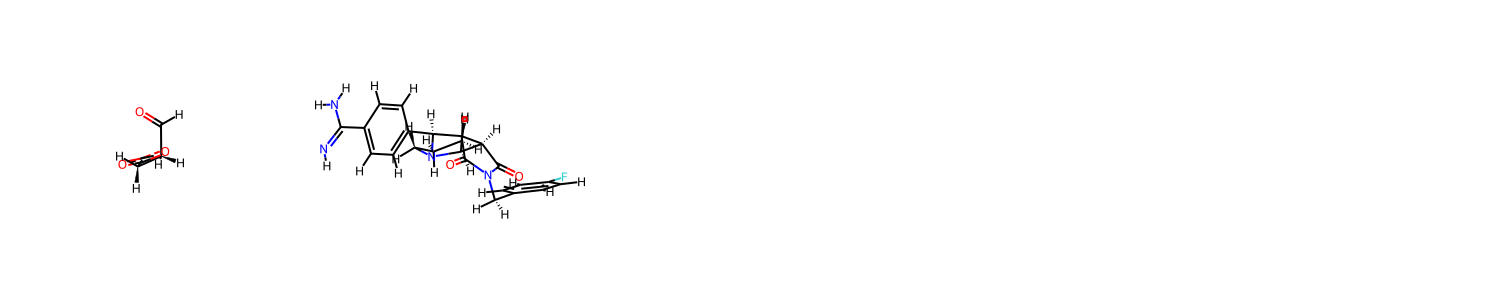

In [62]:
# create list of rdkit molecules
mols = []
ligand_smiles = []
for i in ligs:
    mol = Chem.MolFromMol2File("data/MOL2_files/" + str(i) + "_H.mol2",sanitize=False)
    select_mol_smile = Chem.MolToSmiles(mol)
    ligand_smiles.append(select_mol_smile)
    mols.append(mol)

# view ligands
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(300,300))

Below is code to create the py3Dmol viewer, which consists of three different views. They are as follows:
1. a viewer containing the ligand/s and the receptor, in which the space filling model (surface) of the receptor is present
2. a viewer containing the ligand/s and the receptor, with the addition of transparent boxes around each ligand demonstrating the size and center of the ligand docking boxes. The colors of the ligand boxes differ for clarity's sake, but are otherwise meaningless
3. a viewer containing the ligand/s and the receptor, with the addition of the binding pockets found by fpocket. The colors of the binding pockets differ for clarity's sake, but are otherwise meaningless

To avoid parsing through every binding pocket file only to visualize a portion of them, a list containing all of the pqr file paths for binding pockets with a druggability score greater than 0.20 will be created. The pqr file format includes charge and radius field information for each atom in a binding pocket in addition to information recorded in pdb files.

In [63]:
revised_files = []
pocketPath = os.path.join(current_dir, "data", "PDB_files", str(pdb_id) + "_clean_out", "*.pqr")
pocketFiles = glob.glob(pocketPath)
for file in pocketFiles:
    split_1 = file.split("/")[-1]
    split_2 = split_1.split("_")[0]
    index_num = re.findall(r'\d+', split_2)
    index_num2 = ''.join(str(x) for x in index_num)
    if int(index_num2) in prot_pockets2.index:
        revised_files.append(file)

<div class="alert alert-block alert-info">
<b>Please note:</b> 
When viewing a larger protein receptor, a py3Dmol viewer may not be able to support three views at once. For proteins that are greater than 100 kDa in size, it is recommended to use two different py3Dmol viewers that depict one view each.
</div>

The cell below creates a py3Dmol viewer that has all three views described above in a grid that are linked, where moving one view moves the other two views to the same position in space. __Only use for proteins that are less than 100 kDa in size.__

In [64]:
# View Protein and ligand/s together
# Only use for smaller proteins
view = py3Dmol.view(height = 800, width = 900, viewergrid = (1,3), linked = True)
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

for i in filenames_H:
    viewer_count = 0
    while viewer_count < 3:
        # add receptor (protein) model to all py3Dmol viewers
        view.addModel(open('data/PDB_files/' + str(pdb_id) + '_protein.pdb','r').read(),format='pdb')
        Prot=view.getModel(viewer = (0,viewer_count))
        Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}}, viewer=(0,viewer_count))
 
        # add ligand/s to all py3Dmol viewers
        view.addModel(open(i,'r').read(),format='mol2')
        ref_m = view.getModel(viewer = (0, viewer_count))
        ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})
        viewer_count += 1

view.addSurface(py3Dmol.VDW,{'opacity':0.6,'color':'white'}, viewer=(0,0))

#visualization for docking boxes for each ligand (viewer 2)
a = 0
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'magenta']
for num, i in enumerate(filenames_H):
    view.addBox({"center" :dict(x = lig_box_c[num][0], y = lig_box_c[num][1], z = lig_box_c[num][2]), "dimensions": dict(d = abs(lig_box_s[num][0]), h = abs(lig_box_s[num][1]), w = abs(lig_box_s[num][2])), "color" : colors[a], "opacity" : 0.5}, viewer = (0,1))
    a += 1
    if a > 6:
        a = 0

#visualization for binding pockets found by fpocket (viewer 3)
b = 0
for file in revised_files:
    view.addModel(open(file,'r').read(),format = 'pqr', viewer = (0,2))
    pockets = view.getModel(viewer = (0,2))
    pockets.setStyle({},{'sphere':{'color':colors[b],'opacity':0.5}}) 
    b += 1
    if b > 6:
        b = 0

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

The cells below creates a py3Dmol viewer that 1) visualizes ligands and their docking boxes with the receptor and 2) visualizes the size and location of potential binding pockets along with the ligands and receptor. These can be used for proteins that are of any size, but are necessary for proteins greater than 100 kDa in size.

In [ ]:
view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

# add receptor (protein) model to py3Dmol viewer
view.addModel(open('data/PDB_files/' + str(pdb_id) + '_protein.pdb','r').read(),format='pdb')
Prot=view.getModel()
Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})

#visualization for ligands and docking boxes for each ligand
for i in filenames_H:
    view.addModel(open(i,'r').read(),format='mol2')
    ref_m = view.getModel()
    ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})
    
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'magenta']
a = 0
for j, i in enumerate(filenames_H):
    view.addBox({"center": dict(x = lig_box_c[j][0], y = lig_box_c[j][1], z= lig_box_c[j][2]), "dimensions": dict(d = abs(lig_box_s[j][0]), h = abs(lig_box_s[j][1]), w = abs(lig_box_s[j][2])), "color" : colors[a], "opacity" : 0.5})
    a += 1
    if a > 6:
        a = 0

view.zoomTo()
view.show()

In [ ]:
view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

# add receptor (protein) model to py3Dmol viewer
view.addModel(open('data/PDB_files/' + str(pdb_id) + '_protein.pdb','r').read(),format='pdb')
Prot=view.getModel()
Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})

#visualization ligands
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'magenta']
for h, i in enumerate(filenames_H):
    # add ligand/s to all py3Dmol viewers
    view.addModel(open(i,'r').read(),format='mol2')
    ref_m = view.getModel()
    ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})

a = 0
for file in revised_files:
    view.addModel(open(file,'r').read(),format = 'pqr')
    pockets = view.getModel()
    pockets.setStyle({},{'sphere':{'color':colors[a],'opacity':0.5}}) 
    a += 1
    if a > 6:
        a = 0

view.zoomTo()
view.show()

## Save results for further use

To use the data collected in this notebook for the next notebook in this series (Docking and Preliminary Analysis), a .csv file containing ligand filenames and ligand box sizes and centers will be created, allowing for the variables to be easily imported and used.

In [65]:
center_x = []
center_y = []
center_z = []
size_x = []
size_y = []
size_z = []
for h, i in enumerate(ligs):
    center_x.append(lig_box_c[h][0])
    center_y.append(lig_box_c[h][1])
    center_z.append(lig_box_c[h][2])
    size_x.append(lig_box_s[h][0])
    size_y.append(lig_box_s[h][1])
    size_z.append(lig_box_s[h][2])
ligand_information = pd.DataFrame({"pdb_id": pdb_id,
                                   "ligs": ligs,
                                   "filenames": filenames,
                                   "filenames_H": filenames_H,
                                   "filenames_pdbqt": filenames_pdbqt,
                                   "center_x": center_x,
                                   "center_y": center_y,
                                   "center_z": center_z,
                                   "size_x": size_x,
                                   "size_y": size_y,
                                   "size_z": size_z
                                  })
ligand_smiles_data = pd.DataFrame({"filename_hydrogens": filenames_H,
                                   "smiles": ligand_smiles})
ligand_information.to_csv('data/ligand_information.csv', index = True)
ligand_smiles_data.to_csv('data/ligand_smiles_data.csv', index = False)